# Clustering con l'algoritmo K-means del dataset Iris

Effettueremo dapprima una riduzione della dimensionalità tramite la PCA e valuteremo la bontà del clustering con dei criteri basati sulla matrice di confusione poiché il dataset [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) è un noto semplice benchmark per effettuare classificazione e rende disponibili le etichette di classe.

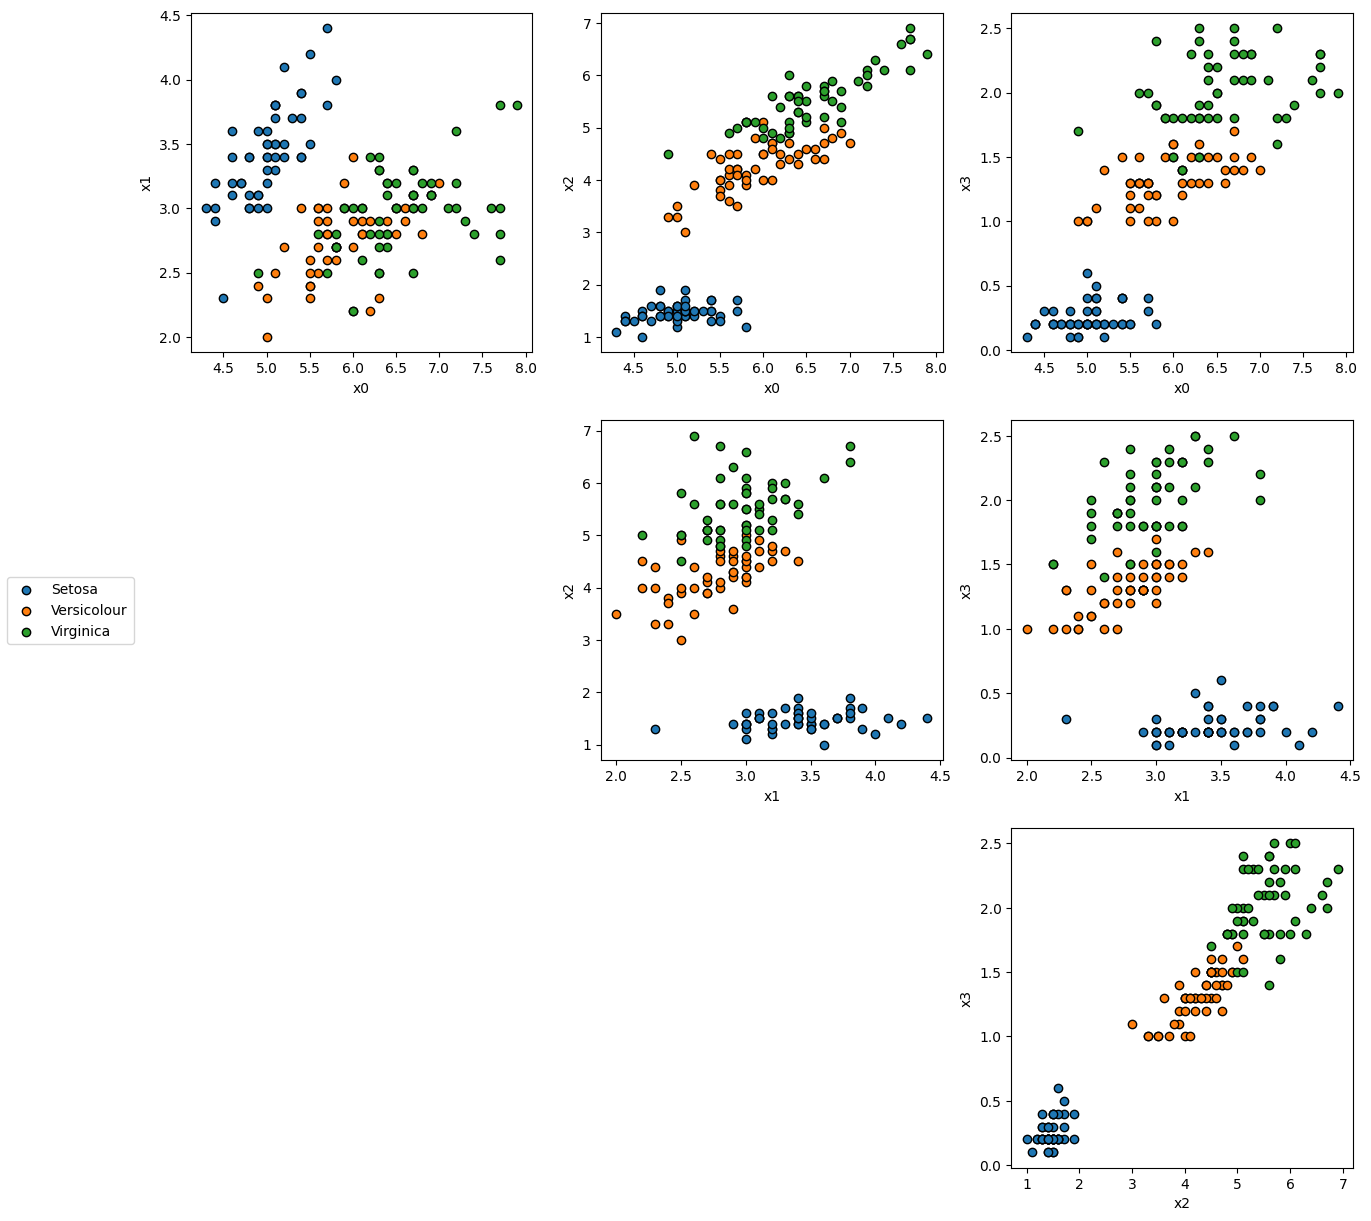

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

X = iris.data
y = iris.target

fig = plt.figure(figsize=(15, 15))

n_features = X.shape[1]

# creiamo il plot di tutte le coppie di feature
for i in range(n_features):
    for j in range(i+1,n_features):
        sub_plt=plt.subplot(3,3,3*i+j)
        sub_plt.set_xlabel(f'x{i}')
        sub_plt.set_ylabel(f'x{j}')
        sub_plt.scatter(X[y==0,i], X[y==0,j], edgecolor='k')
        sub_plt.scatter(X[y==1,i], X[y==1,j], edgecolor='k')
        sub_plt.scatter(X[y==2,i], X[y==2,j], edgecolor='k')

        
fig.legend(('Setosa','Versicolour','Virginica'),loc='center left')
plt.show()
        


Calcoliamo la varianza totale attraverso la SVD: eseguiamo la PCA che usa la SVD al suo interno, poiché la SVD equivale alla PCA per dati a media nulla, ma manteniamo tutte le componenti.

In [52]:
pca = decomposition.PCA(n_components=4, svd_solver='full')
pca.fit(X)

total_variation = np.sum(pca.singular_values_ ** 2)

print(f'Varianza totale: {total_variation}')

Varianza totale: 681.3705999999997


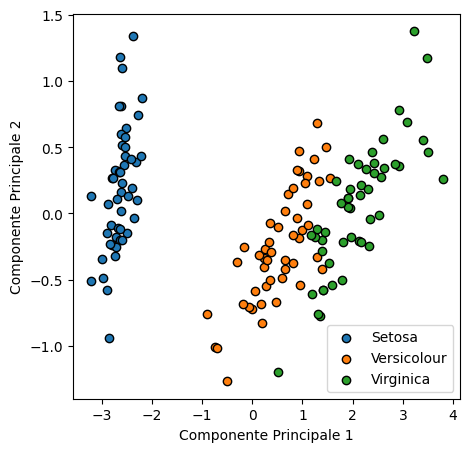

Varianza totale: 666.1659556405608 pari al 97.77% del totale


In [53]:
fig = plt.figure(figsize=(5, 5))
pca = decomposition.PCA(n_components=2, svd_solver='arpack') # esegue direttamente la SVD troncata a k componenti
pca.fit(X)
X_2 = pca.transform(X)

plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')

plt.scatter(X_2[y == 0, 0], X_2[y == 0, 1], edgecolor='k', label='Setosa')
plt.scatter(X_2[y == 1, 0], X_2[y == 1, 1], edgecolor='k', label='Versicolour')
plt.scatter(X_2[y == 2, 0], X_2[y == 2, 1], edgecolor='k', label='Virginica')

plt.legend()

plt.show()

# Calcoliamo la varianza totale a due componenti
tv2 = np.sum(pca.singular_values_ ** 2)
print(f'Varianza totale: {tv2} pari al {100*tv2/total_variation:4.2f}% del totale')

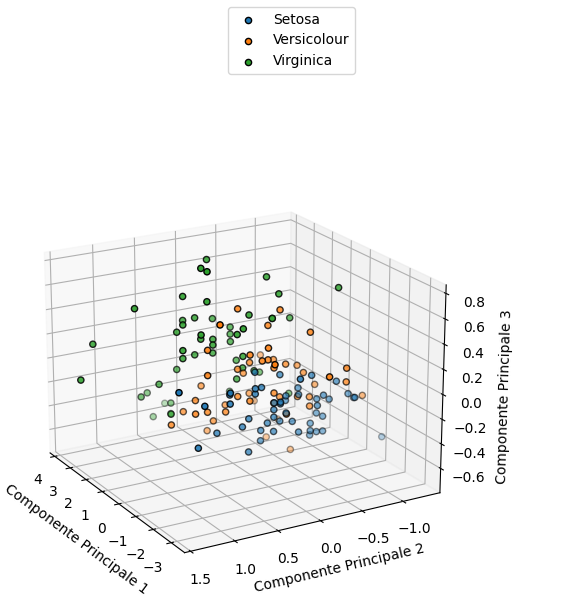

Varianza totale: 677.8191711469555 pari al 99.48% del totale


In [54]:
fig = plt.figure(figsize=(5, 5))

# Il grafico 3D non viene aggiunto automaticamente alla figura,
# ma la figura lo include esplicitamente
ax = axes3d.Axes3D(fig, rect=[-0.5, -0.2, 0.9, 0.9], elev=20, azim=150, auto_add_to_figure=False)
fig.add_axes(ax)

pca = decomposition.PCA(n_components=3,svd_solver='arpack')
pca.fit(X)
X_3 = pca.transform(X)

ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')

ax.scatter(X_3[y==0, 0], X_3[y==0, 1], X_3[y==0, 2], edgecolor='k')
ax.scatter(X_3[y==1, 0], X_3[y==1, 1], X_3[y==1, 2], edgecolor='k')
ax.scatter(X_3[y==2, 0], X_3[y==2, 1], X_3[y==2, 2], edgecolor='k')

fig.legend(('Setosa','Versicolour','Virginica'),loc='upper center')
plt.show()

# Calcoliamo la varianza totale a tre componenti
tv3 = np.sum(pca.singular_values_ ** 2)
print(f'Varianza totale: {tv3} pari al {100*tv3/total_variation:4.2f}% del totale')

# Individuazione del numero ottimo di cluster con l'Elbow Method sulla WCSS

Effettueremo il clustering del data set Iris, dapprima con un numero variabile di cluster per determinare qual'è il numero giusto. In questo caso si utilizza una misura di bontà del clustering che è la ***Within Cluster Sum of Squares (WCSS)*** $WCSS = \sum_{k=1}^{K}\sum_{i \in C_k}(\boldsymbol{x}_{i}-\bar{\boldsymbol{x}}_k)^2$.

Si nota che all'aumentare del numero di cluster usati dall'algoritmo, WCSS decresce asintoticamente e la curva forma un _gomito_ nel punto in cui i cluster sono ottimali. Da qui il nome di "elbow method".

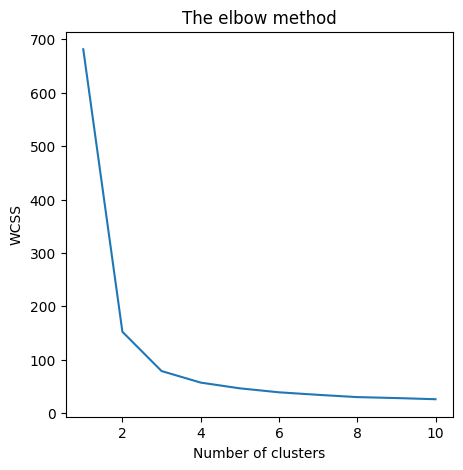

In [55]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#facciamo il plot
plt.figure(figsize=(5,5))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Adesso effettueremo il clustering con tre cluster sul data set intero e sulle versioni a ridotta dimensionalità e poi vcaluteremo la bontà del clustering tramite l'analisi della matrice di confusione.

## Dataset a 4 dimensioni

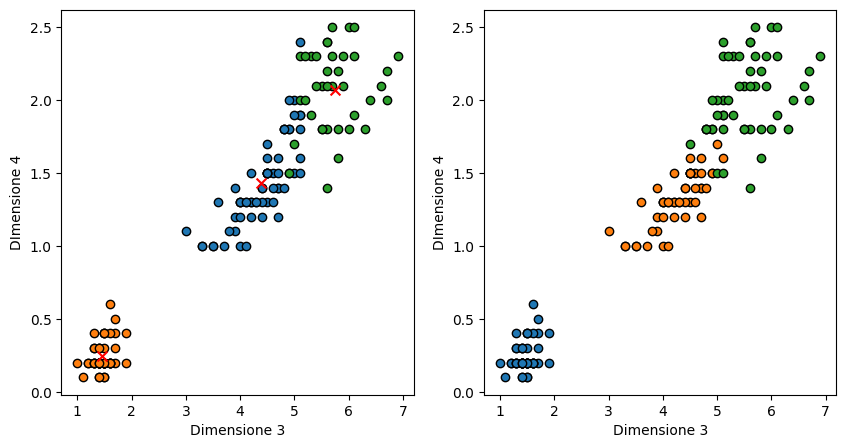

In [56]:
# K-means su dati a 4 dimensioni


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualizziamo i cluster a 4 dimensioni
labels = list(iris.target_names)
labels.append('Centroids')

fig = plt.figure(figsize=(10,5))
subplt=fig.add_subplot(1,2,1)
subplt.set_xlabel('Dimensione 3')
subplt.set_ylabel('DImensione 4')

subplt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], edgecolor='k')
subplt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], edgecolor='k')
subplt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], edgecolor='k')

#Inseriamo i centroidi
subplt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=50, marker='x', c = 'r')

# Visualizziamo anche i dati veri
subplt=fig.add_subplot(1,2,2)
subplt.set_xlabel('Dimensione 3')
subplt.set_ylabel('DImensione 4')

subplt.scatter(X[y == 0,2], X[y == 0,3], edgecolor='k')
subplt.scatter(X[y == 1,2], X[y == 1,3], edgecolor='k')
subplt.scatter(X[y == 2,2], X[y == 2,3], edgecolor='k')



Notiamo che c'è stata una re-indicizzaizone interna dei cluster creata dall'esecuzione dell'algoritmo k-means:

- classe 0 --> cluster 1
- classe 1 --> cluster 0
- classe 2 --> cluster 2

Procediamo a rimappare le etichette dei cluster in modo tale da allineare elichette di classe e di cluster e utilizzare le misure di bontà del clustering basate sulla matrice di confusione.

In [57]:
# funzione di utilità di scambio etichette di cluster
def remap_cluster(ycluster, remap):
    """rimappa i cluster in ycluster le regole riportate in remap. Restituisce un nuovo array di etichette.

    Args:
        ycluster (ndarray[int]): array delle etichette di cluster
        remap (tuple[tuple[int,int]]): tupla delle coppie (da, a) che esprimono il remap
    """
    
    y_remap = np.ndarray(ycluster.shape,ycluster.dtype)
    
    y_remap.fill(-1)
    
    for da, a in remap:
        y_remap[ycluster==da] = a
    
    return y_remap
            
y_remap = remap_cluster(y_kmeans,((0,1),(1,0),(2,2)))

Rifacciamo la visualizzazione

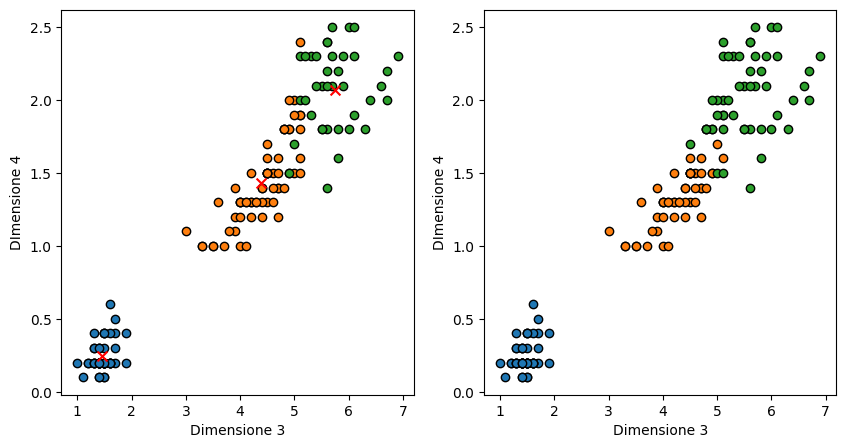

In [58]:
# Visualizziamo i cluster a 4 dimensioni
labels = list(iris.target_names)
labels.append('Centroids')

fig = plt.figure(figsize=(10,5))
subplt=fig.add_subplot(1,2,1)
subplt.set_xlabel('Dimensione 3')
subplt.set_ylabel('DImensione 4')

subplt.scatter(X[y_remap == 0, 2], X[y_remap == 0, 3], edgecolor='k')
subplt.scatter(X[y_remap == 1, 2], X[y_remap == 1, 3], edgecolor='k')
subplt.scatter(X[y_remap == 2, 2], X[y_remap == 2, 3], edgecolor='k')

#Inseriamo i centroidi
subplt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=50, marker='x', c = 'r')

# Visualizziamo anche i dati veri
subplt=fig.add_subplot(1,2,2)
subplt.set_xlabel('Dimensione 3')
subplt.set_ylabel('DImensione 4')

subplt.scatter(X[y == 0,2], X[y == 0,3], edgecolor='k')
subplt.scatter(X[y == 1,2], X[y == 1,3], edgecolor='k')
subplt.scatter(X[y == 2,2], X[y == 2,3], edgecolor='k')


Adesso iniziamo l'analisi della bontà del clustering

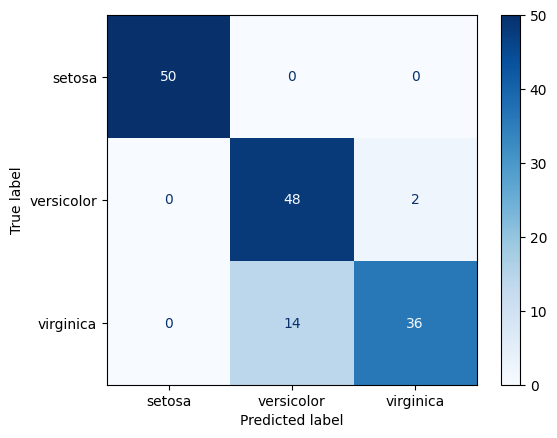

In [59]:
# importiamo i package di sci-kit learn per visualizzare la matrice di confusione e poi calcoliamo gli indici
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_remap)

ConfusionMatrixDisplay.from_predictions(y, y_remap, display_labels=iris.target_names,cmap=plt.cm.Blues)


In [60]:
# Calcoliamo le metriche di purity e gini index
def cluster_metrics(cm):
    """Calcolo della purity e dell'indice di Gini da una matrice di confusione

    Args:
        cm (ndarray): matrice di confusione

    Returns:
        tuple[float,float]: i due valori di metrica
    """

    Mval = [np.sum(cm[:,i]) for i in range(cm.shape[1])]
    
    M = np.array(Mval)

    Pval = [np.max(cm[:,i]) for i in range(cm.shape[1])]

    P = np.array(Pval)

    purity = np.sum(P)/np.sum(M)
    
    gini_val = [np.sum((cm[i,:]/M[i])**2) for i in range(cm.shape[0])]

    gini_j = 1 - np.array(gini_val)
    
    gini = np.dot(gini_j, M)/np.sum(M)
    
    return purity, gini

purity, gini = cluster_metrics(cm)

print(f'Purity: {purity:5.2f}\nGini Index: {gini:5.2f}\n')

Purity:  0.89
Gini Index:  0.16



## Clustering a tre dimensioni

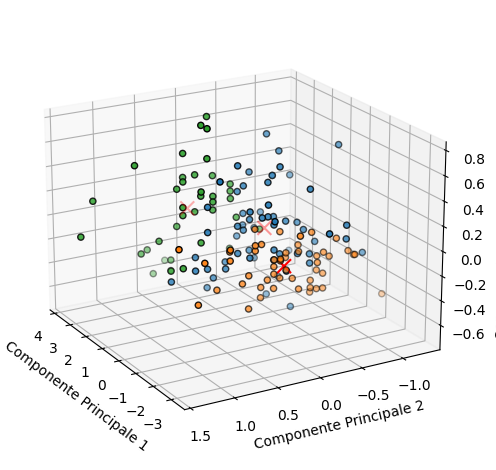

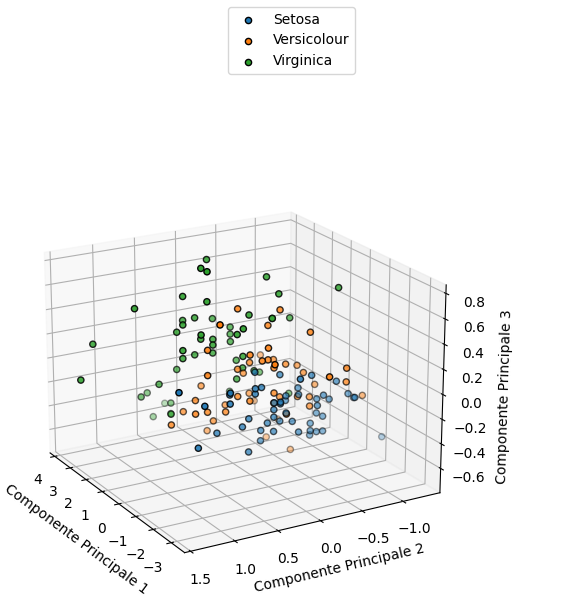

In [64]:
# K-means su dati a 3 dimensioni
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_3_kmeans = kmeans.fit_predict(X_3)

# Il grafico 3D non viene aggiunto automaticamente alla figura,
# ma la figura lo include esplicitamente
fig = plt.figure(figsize=(5, 5))

subplt = axes3d.Axes3D(fig, rect=[-0.5, -0.2, 0.9, 0.9], elev=20, azim=150, auto_add_to_figure=False)
fig.add_axes(subplt)

subplt.set_xlabel('Componente Principale 1')
subplt.set_ylabel('Componente Principale 2')
subplt.set_zlabel('Componente Principale 3')

subplt.scatter(X_3[y_3_kmeans==0, 0], X_3[y_3_kmeans==0, 1], X_3[y_3_kmeans==0, 2], edgecolor='k')
subplt.scatter(X_3[y_3_kmeans==1, 0], X_3[y_3_kmeans==1, 1], X_3[y_3_kmeans==1, 2], edgecolor='k')
subplt.scatter(X_3[y_3_kmeans==2, 0], X_3[y_3_kmeans==2, 1], X_3[y_3_kmeans==2, 2], edgecolor='k')

subplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=100, marker='x', c = 'r')
plt.show()

fig = plt.figure(figsize=(5, 5))

subplt = axes3d.Axes3D(fig, rect=[-0.5, -0.2, 0.9, 0.9], elev=20, azim=150, auto_add_to_figure=False)
fig.add_axes(subplt)

subplt.set_xlabel('Componente Principale 1')
subplt.set_ylabel('Componente Principale 2')
subplt.set_zlabel('Componente Principale 3')

subplt.scatter(X_3[y==0, 0], X_3[y==0, 1], X_3[y==0, 2], edgecolor='k')
subplt.scatter(X_3[y==1, 0], X_3[y==1, 1], X_3[y==1, 2], edgecolor='k')
subplt.scatter(X_3[y==2, 0], X_3[y==2, 1], X_3[y==2, 2], edgecolor='k')
fig.legend(('Setosa','Versicolour','Virginica'),loc='upper center')

plt.show()


Si deve fare il solito remap e poi procediamo a visualizzare la matrice di confusione e a calcolare i valori di purity e Indice di Gini.

Purity:  0.89
Gini Index:  0.16



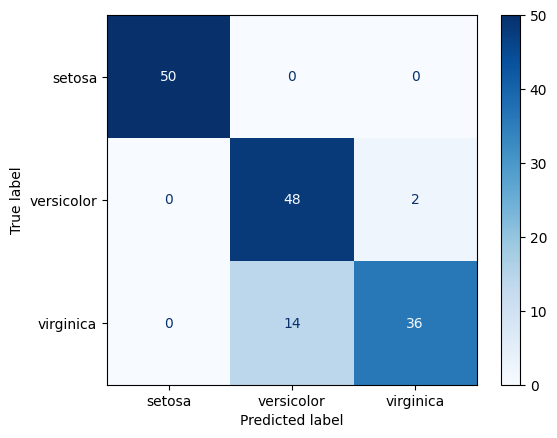

In [65]:
y_3_remap = remap_cluster(y_3_kmeans,((0,1),(1,0),(2,2)))

cm = confusion_matrix(y, y_3_remap)

ConfusionMatrixDisplay.from_predictions(y, y_3_remap, display_labels=iris.target_names,cmap=plt.cm.Blues)

purity, gini = cluster_metrics(cm)

print(f'Purity: {purity:5.2f}\nGini Index: {gini:5.2f}\n')


## Clustering a 2 dimensioni

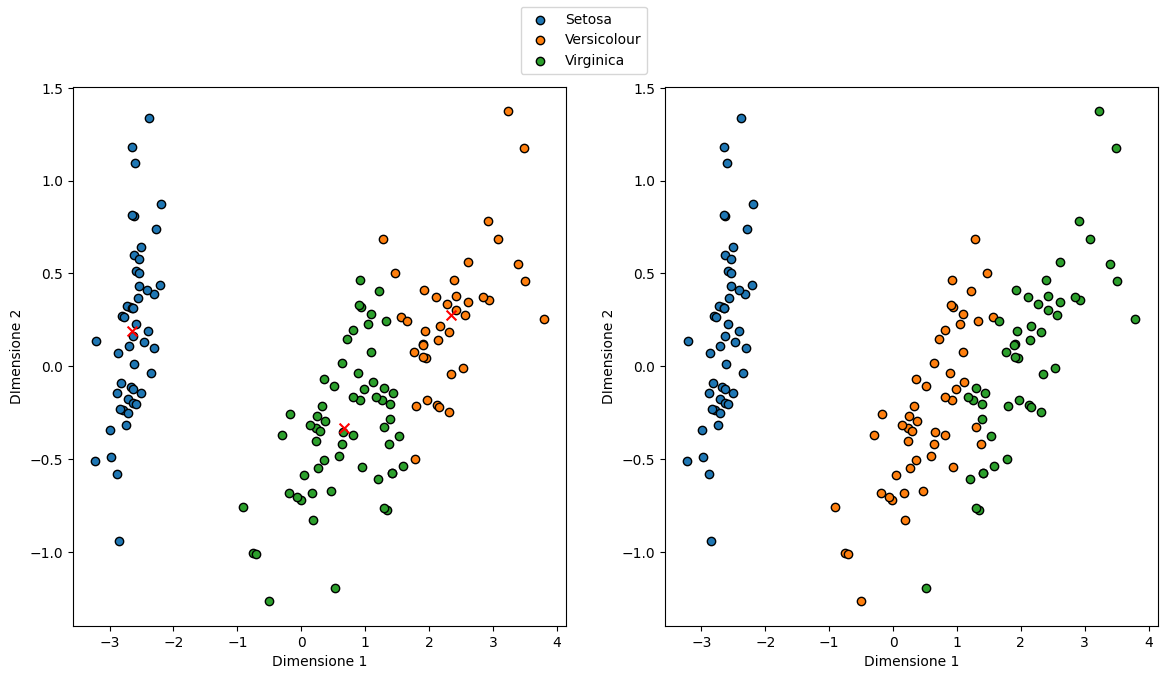

In [72]:
# K-means su dati a 2 dimensioni
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_2_kmeans = kmeans.fit_predict(X_2)

# Visualizziamo i cluster a 2 dimensioni
labels = list(iris.target_names)
labels.append('Centroids')

fig = plt.figure(figsize=(14,7))
subplt=fig.add_subplot(1,2,1)
subplt.set_xlabel('Dimensione 1')
subplt.set_ylabel('DImensione 2')

subplt.scatter(X_2[y_2_kmeans == 0, 0], X_2[y_2_kmeans == 0, 1], edgecolor='k')
subplt.scatter(X_2[y_2_kmeans == 1, 0], X_2[y_2_kmeans == 1, 1], edgecolor='k')
subplt.scatter(X_2[y_2_kmeans == 2, 0], X_2[y_2_kmeans == 2, 1], edgecolor='k')

#Inseriamo i centroidi
subplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=50, marker='x', c = 'r')

# Visualizziamo anche i dati veri
subplt=fig.add_subplot(1,2,2)
subplt.set_xlabel('Dimensione 1')
subplt.set_ylabel('DImensione 2')

subplt.scatter(X_2[y == 0,0], X_2[y == 0,1], edgecolor='k')
subplt.scatter(X_2[y == 1,0], X_2[y == 1,1], edgecolor='k')
subplt.scatter(X_2[y == 2,0], X_2[y == 2,1], edgecolor='k')

fig.legend(('Setosa','Versicolour','Virginica'),loc='upper center')

plt.show()


Facciamo il nuovo remap e poi calcoliamo gli indici.

Purity:  0.89
Gini Index:  0.16



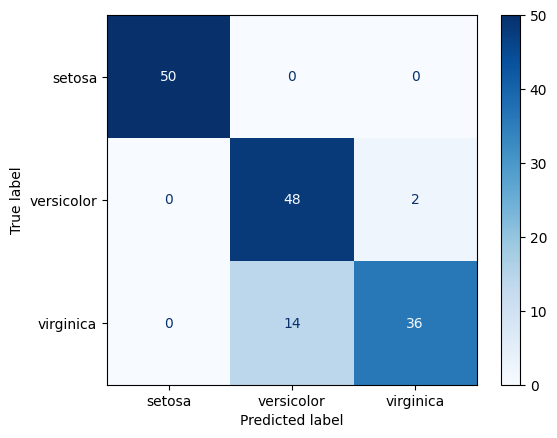

In [73]:
y_2_remap = remap_cluster(y_3_kmeans,((0,0),(1,2),(2,1)))

cm = confusion_matrix(y, y_3_remap)

ConfusionMatrixDisplay.from_predictions(y, y_3_remap, display_labels=iris.target_names,cmap=plt.cm.Blues)

purity, gini = cluster_metrics(cm)

print(f'Purity: {purity:5.2f}\nGini Index: {gini:5.2f}\n')


E' mostrato che bastano le due componenti principali PCA per ottenere il clustering con queste misure di bontà.

## Esercizi

1. Analizzare il dataset con degli score sulle feature per scegliere direttamente le feature migliori e rifare la procedura di clustering e di analisi

2. Un algoritmo diverso potrebbe aiutare a migliorare le performance? Sceglierne uno tra quelli studiati e implementarlo usando la libreria sci-kit learn.